# More edgeing

Canny Edge Detection

minVal, maxVal = median of all pixels * 0.67, median of all pixels * 1.33

Analysering av grundläggande egenskaper i bilder

- Thresholding – Repetition

- Kantdetektering – Sobel och Canny

- Hörndetektering och matchning av egenskaper

- Simpel detektering av geometriska figurer

 

Under lektionen jobbar vi på följande övningsuppgift: ÖVNINGSUPPGIFT 4 - Canny kantdetektering, hörndetektering, "feature matching" och simpel objektdetektering


    Ladda ner en bild och experimentera med funktionen cv2.Canny för att så långt det går hitta alla kanter i bilden. 
    Ladda ner en valfri bild som innehåller många “hörn” och experimentera med Harris Corner Detector i OpenCV för att försöka markera alla hörn i bilden. Försök komma på ett sätt att räkna antalet hörn som Harris Corner Detector hittat i bilden. 
    Ladda ner/fotografera 2 bilder som har matchande egenskaper. Gör ett OpenCV-Python skript som hittar dessa egenskaper och matchar dem visuellt med varandra (dvs. “pekar” ut dem). Använd t.ex. tutorial som hjälp och experimentera med de olika metoderna. 
    Skapa ett skript i OpenCV-Python som klarar av att detektera fyrhörningar och trianglar i en valfri bild .Låt skriptet rita ut konturerna runt de hittade figurerna samt visa en "text label" vid varje hittad figur som beskriver figurtypen. För att rita ut / "highlighta" konturen runt en figur, kan du använda cv2.drawContours. Funktionen kräver en binär bild som input så kör thresholding eller edge detection först (beroende på hurdan bild du har). För att skriva ut "text labels" kan du använda cv2.putText.  Själva identifieringsalgoritmen kan vara väldigt simpel: Använd t.ex. funktionen cv2.approxPolyDp funktionen för att approximera figurer på de hittade konturerna och efter det kan du helt enkelt räkna antalet hörn i de approximerade figurerna:

    3 hörn => triangel
    4 hörn => fyrhörning


In [1]:
# imports and installs
%pip install matplotlib
%pip install scipy 
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import scipy.ndimage as ndimage

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
carmeetImg = cv.imread("jdm_carmeet.jpg", 0)
bmwE30Img = cv.imread("bmw_e30.jpg", 0)
coloredWoodImg = cv.imread("colored_wood_horizontally.jpg", 0)

In [3]:
# Canny image detection on complicated image = car meet
cannnyEdgeImg = cv.Canny(carmeetImg, np.median(carmeetImg) * 0.67, np.median(carmeetImg) * 1.33)

cv.imshow("Canny Edge detection", cannnyEdgeImg)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# sobel first
sobelBmwImgX = cv.Sobel(bmwE30Img, -1, 1, 0, 3)
sobelBmwImgY = cv.Sobel(bmwE30Img, -1, 0, 1, 3)
sobelBmwImg = sobelBmwImgX + sobelBmwImgY

# Canny image detection on simpler image = bmw E30
cannnyEdgeImg = cv.Canny(bmwE30Img, np.median(bmwE30Img) * 0.67, np.median(bmwE30Img) * 1.33)

# add original, sobel and canny together
sobelCannyImg = cv.vconcat([sobelBmwImg, cannnyEdgeImg])

cv.imshow("Canny Edge detection", sobelCannyImg)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
# image blur (median)
blurredWoodImg = cv.medianBlur(coloredWoodImg, 3)

# Canny image detection on easy image = colored wood
cannnyEdgeImg = cv.Canny(blurredWoodImg, np.median(blurredWoodImg) * 0.67, np.median(blurredWoodImg) * 1.33)

cv.imshow("Canny Edge detection", cannnyEdgeImg)
cv.waitKey(0)
cv.destroyAllWindows()

### Working on a really blurry image

Contrast can still be good

In [6]:
blurryHouseImg = cv.imread("blurry_house.jpg", 0)

cv.imshow("Original", blurryHouseImg)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
# sharpening/edge enhancment mask
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpenedHouse = cv.filter2D(blurryHouseImg, -1, kernel)

cv.imshow("Sharpening/edge enhancment", sharpenedHouse)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
cannyHouse = cv.Canny(sharpenedHouse, 40, 80)

cv.imshow("Canny Edges", cannyHouse)
cv.waitKey(0)
cv.destroyAllWindows()

### Harris corner detector

built on the Sobel edge detection

where two edges meet

cv.cornerHarris(src, blockSize, kSize, k)

**output:** confidence map (ndarray) with the points, not the original image

In [9]:
# read image
cubeImg = cv.imread("cube.jpg", 1)
grayImage = cv.cvtColor(cubeImg, cv.COLOR_BGR2GRAY)

In [10]:
#use harris
result = cv.cornerHarris(grayImage, blockSize=2, ksize=3, k=0.04)
result = cv.dilate(result, None) #dilate makes the dots bigger (to make them visible)

#threshold
threshold = 0.01 * result.max()

cubeImg[result > threshold] = [0, 0, 255]
cv.imshow("Harris Corners", cv.cvtColor(cubeImg, cv.COLOR_BGR2RGB))
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
def countRed(corners): 
    red_mask = np.all(corners == [0, 0, 255], axis=-1)  # Check all color channels
    return np.count_nonzero(red_mask)  # Count red pixels
countRed(result)

ValueError: operands could not be broadcast together with shapes (777,920) (3,) 

### FEATURE MATCHING

In [17]:
# images 
classroom1 = cv.imread("klassrum2.jpg", cv.IMREAD_GRAYSCALE)
classroom2 = cv.imread("klassrum1.jpg", cv.IMREAD_GRAYSCALE)

In [18]:
# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(classroom1,None)
kp2, des2 = orb.detectAndCompute(classroom2,None)

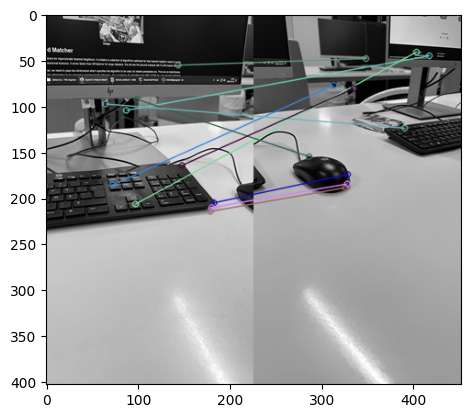

(<matplotlib.image.AxesImage at 0x23e0ff26e90>, None)

In [19]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
result = cv.drawMatches(classroom1,kp1,classroom2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result),plt.show()

### Contours

In [33]:
# simple picture of some figures 
figuresImg = cv.imread("simple_figures.jpg", 1)
grayFigures = cv.cvtColor(figuresImg, cv.COLOR_BGR2GRAY)
#get contours
ret, thresh = cv.threshold(grayFigures, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [34]:
# draw the countors
cv.imshow("contours", cv.drawContours(grayFigures, contours, -1, (0,255,0), 3))
cv.waitKey(0)
cv.destroyAllWindows()